[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 425 samples in 0.000s...
[t-SNE] Computed neighbors for 425 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 425 / 425
[t-SNE] Mean sigma: 317.082489
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.622589
[t-SNE] KL divergence after 1000 iterations: 0.240865


<IPython.core.display.Javascript object>


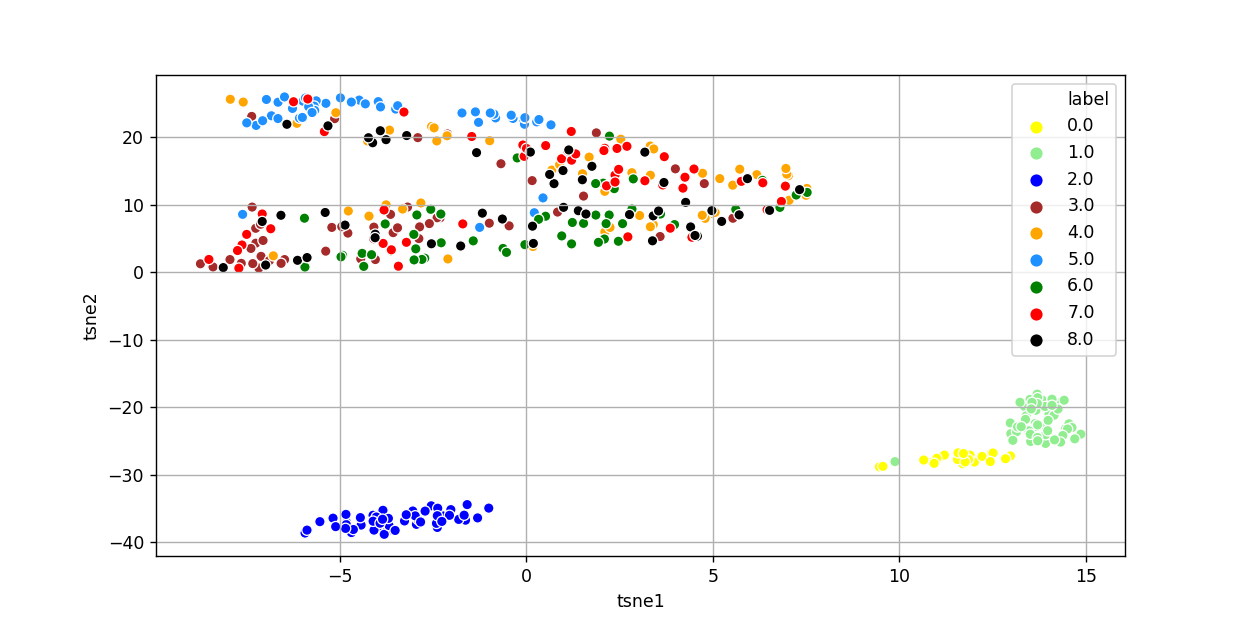

<IPython.core.display.Javascript object>


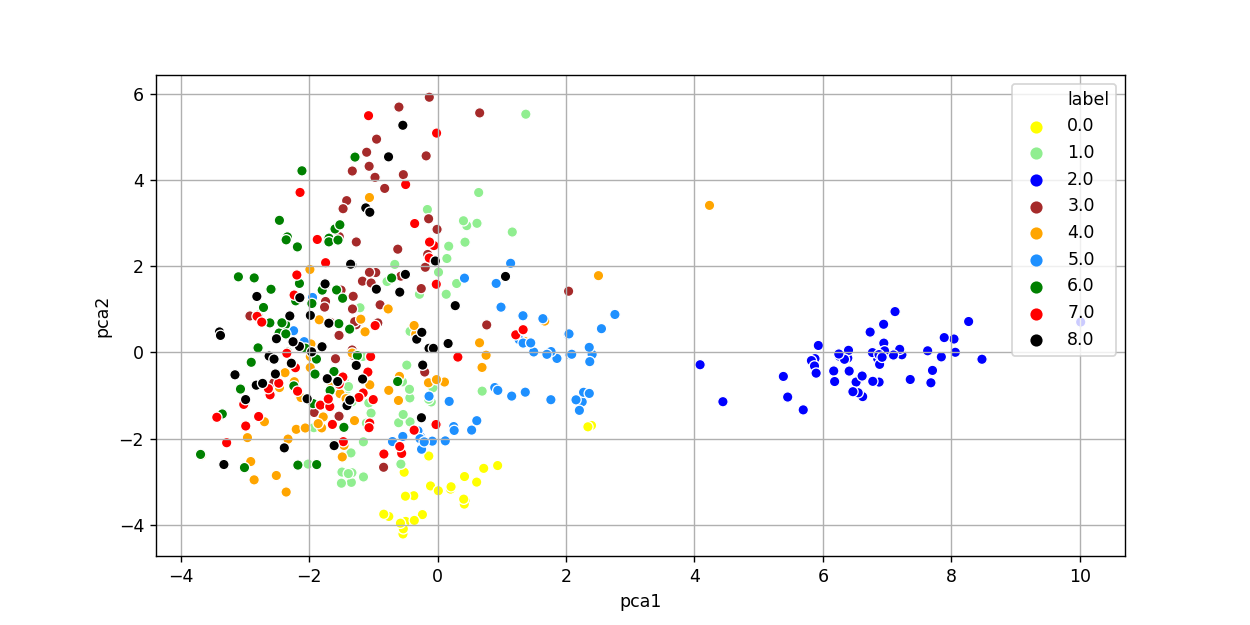

<IPython.core.display.Javascript object>


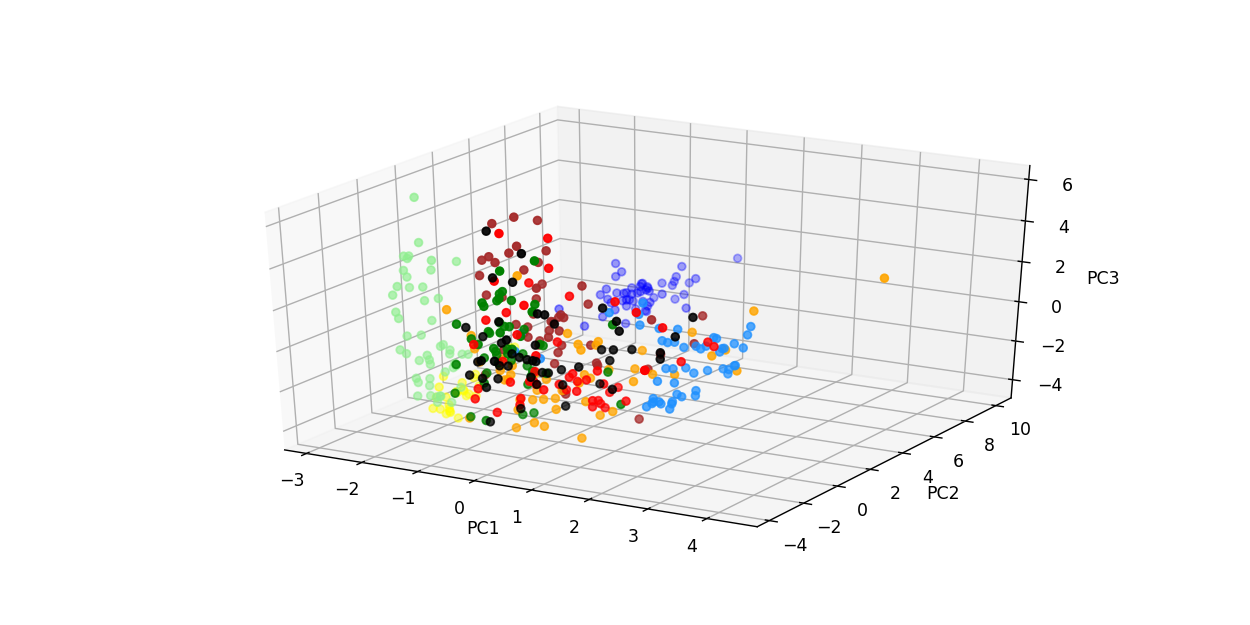

In [4]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler

tdata = np.loadtxt("punjab_data.txt")
X = tdata[:,0:15]
Y = tdata[:,15].reshape(X.shape[0],1)
X_std = StandardScaler().fit_transform(X)
# implement PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame({'pca1':principalComponents[:,0],'pca2':principalComponents[:,1],'pca3':principalComponents[:,2],'label':Y[:,0]})
pca_df.head()

#implement T-SNE
tsne = TSNE(n_components=2, random_state=0,verbose=1, perplexity=40, n_iter=1000)
tsne_result= tsne.fit_transform(X)
tsne_df = pd.DataFrame({'tsne1':tsne_result[:,0],'tsne2':tsne_result[:,1],'label':Y[:,0]})
tsne_df.head()

#plot TSNE 2d
fig = plt.figure(figsize=(10,5))
sns.scatterplot('tsne1', 'tsne2',
                hue='label',
                palette=['yellow','lightgreen','blue','brown','orange',
                       'dodgerblue','green','red','black'],
                data=tsne_df,
                legend="full")
plt.grid()
fig.savefig('tsne_2_pubjab.png')

#plot PCA 2
fig = plt.figure(figsize=(10,5))
sns.scatterplot('pca1', 'pca2',
                hue='label',
                palette=['yellow','lightgreen','blue','brown','orange',
                       'dodgerblue','green','red','black'],
                data=pca_df,
                legend="full")
plt.grid()
fig.savefig('pca_2_punjab.png')

#plot PCA 3
LABEL_COLOR_MAP = {0 : 'yellow',1 : 'lightgreen', 2:'blue', 3:'brown', 4:'orange',5:'dodgerblue', 6:'green', 7:'red',8:'black'}
label_color = [LABEL_COLOR_MAP[l] for l in Y[:,0]]
gph = plt.figure(figsize=(10,5)).gca(projection='3d')
gph.scatter(pca_df.pca3, pca_df.pca1, pca_df.pca2, c = label_color)
gph.set_xlabel('PC1')
gph.set_ylabel('PC2')
gph.set_zlabel('PC3')
plt.grid()


In [2]:
import time
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

tdata = np.loadtxt("punjab_data.txt")
X = tdata[:,0:15]
Y = tdata[:,15].reshape(X.shape[0],1)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X)
Y = Y.reshape(X.shape[0],)
classes = 9
finalCf =np.zeros(classes)
f = 0
filteredX = np.array([]).reshape(0,X.shape[1])
filteredY = np.array([]).reshape(0,1)

names = ['B1','B2', 'B3', 'B4', 'B5', 'B6','B7','B8','B8A','B9','B10','B11', 'B12','VH','VV'];

for train_index, test_index in skf.split(X,Y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    #training and testing with SVM
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    cf = confusion_matrix(y_test, predictions)
    finalCf = finalCf + cf
    
    # get correctly predicted data
    filteredIndices = np.asarray(np.where(predictions==y_test))
    filteredIndices = filteredIndices.reshape(filteredIndices.shape[1],1)

    filteredXTest = np.take(X_test,filteredIndices,axis = 0)
    filteredXTest = filteredXTest.reshape(filteredXTest.shape[0],filteredXTest.shape[2])
    filteredX = np.concatenate([filteredX,filteredXTest])
    filteredYTest = np.take(y_test,filteredIndices)
    filteredY = np.concatenate([filteredY,filteredYTest])
    print(filteredYTest.shape)
      
print(finalCf)
TP = np.diagonal(finalCf)
accuracy = (np.trace(finalCf)/Y.shape[0])*100
precision = np.sum(np.divide(TP,np.sum(finalCf,axis=1)))/classes
recall = np.sum(np.divide(TP,np.sum(finalCf,axis=0)))/classes
print(accuracy)
print(precision)
print(recall)

filteredData = np.concatenate([filteredX,filteredY],axis = 1)
print(filteredData.shape)


(34, 1)
(35, 1)
(37, 1)
(31, 1)
(32, 1)
(31, 1)
(33, 1)
(34, 1)
(31, 1)
(33, 1)
[[50.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 50.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 50.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 29.  7.  2.  1.  2.  9.]
 [ 0.  1.  0.  3. 32.  4.  3.  3.  4.]
 [ 0.  0.  0.  2.  0. 45.  0.  2.  1.]
 [ 0.  0.  0.  0.  2.  1. 37.  5.  5.]
 [ 0.  0.  0.  2.  6.  3.  9. 25.  5.]
 [ 0.  0.  0. 11.  5.  0. 12.  9. 13.]]
73.55555555555556
0.7355555555555555
0.7247315191993586
(331, 16)
